In [2]:
import pandas as pd
import numpy as np
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns

In [3]:
# Load Data
df = pd.read_csv("./data/customer_segmentation/customers.csv",lineterminator='\n')

In [4]:
# Analyze
df.sample(5)

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.mailing,Customers.last_modified,Orders.id,Orders.fname,Orders.lname,Orders.order_number,...,Products.packaging,Products.multiple,Products.upc,Products.hcpcs,Products.case_qty,Products.import_flags,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.family_id
243,236,Kathleen,Fasciano,1405801030,1.0,1437762906,1108,Kathleen,Fasciano,1108,...,1 Each / Each,1 EA,8.019692e+10,L0625,1,0.0,12.5,5.5,3.0,PF03301
3736,3289,Barbara,Wasem,1461170720,1.0,1461170720,15877,Barbara,Wasem,15877,...,1 Each / Case,1 CS,8.223830e+11,E1038,1,136.0,28.0,11.0,30.5,PF21897
1221,1018,Todd,Knurr,1431465986,1.0,1437559879,6546,Todd,Knurr,6546,...,816 Each / Case,1 CS,8.223830e+11,NO CODE - PRODUCT DOES NOT MEET HCPCS SPECIFIC...,816,0.0,15.7,9.9,10.9,PF66413
3445,2984,David,Fein,1459268304,1.0,1459268304,14867,David,Fein,14867,...,6 Box of 12 / Case,1 CS,8.223830e+11,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,6,256.0,16.2,12.4,5.5,PF04657
3692,3240,Lynn,Macauley,1460757199,1.0,1460757199,15685,Lynn,Macauley,15685,...,1 Each / Each,1 EA,8.223830e+11,E0325,1,0.0,9.4,3.1,2.9,PF06223


In [5]:
df.shape

(4194, 74)

In [12]:
pd.to_datetime(df['Customers.create_date'], unit='s')

0      2015-03-10 20:18:44
1      2013-12-03 16:45:39
2      2013-12-03 16:45:39
3      2013-12-11 16:44:23
4      2013-12-12 15:19:59
5      2013-12-12 15:19:59
6      2013-12-12 15:19:59
7      2013-12-27 14:52:27
8      2014-01-09 21:33:36
9      2014-01-23 20:38:36
10     2014-01-24 14:19:15
11     2014-01-25 01:28:34
12     2014-01-27 20:53:59
13     2014-01-27 20:53:59
14     2014-01-27 20:53:59
15     2014-01-29 16:13:37
16     2014-02-02 17:41:13
17     2014-03-20 20:50:41
18     2014-02-05 16:45:32
19     2014-02-07 23:16:06
20     2014-02-08 21:59:06
21     2014-02-08 21:59:06
22     2014-02-08 21:59:06
23     2014-02-08 21:59:06
24     2014-02-10 16:07:54
25     2014-02-10 16:10:47
26     2014-02-10 17:38:57
27     2014-02-11 15:46:40
28     2014-02-11 15:46:40
29     2014-02-11 15:46:40
               ...        
4164   2016-05-14 19:17:54
4165   2016-05-14 19:43:34
4166   2016-05-14 19:43:34
4167   2016-05-14 20:24:38
4168   2016-05-14 20:48:07
4169   2016-05-14 20:48:07
4

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 74 columns):
Customers.id                     4194 non-null int64
Customers.fname                  4194 non-null object
Customers.lname                  4194 non-null object
Customers.create_date            4194 non-null int64
Customers.mailing                4194 non-null float64
Customers.last_modified          4194 non-null int64
Orders.id                        4194 non-null int64
Orders.fname                     4194 non-null object
Orders.lname                     4194 non-null object
Orders.order_number              4194 non-null object
Orders.currency                  4194 non-null object
Orders.subtotal                  4194 non-null float64
Orders.shipping                  4194 non-null float64
Orders.total                     4194 non-null float64
Orders.shipping_carrier          4194 non-null object
Orders.shipping_method           4194 non-null object
Orders.tracking              

In [5]:
df[['Customers.mailing', 'Orders.shipping', 'Orders.payment_status', 'Orders.status' \
 , 'Products.vendor', 'Products.import_id', 'Products.flags' \
 , 'Products.taxable' \
 , 'Products.shopping_flags' \
 , 'Products.import_flags']].apply(lambda x: x.astype('category'))


,Customers.mailing,Orders.shipping,Orders.payment_status,Orders.status,Products.vendor,Products.import_id,Products.flags,Products.taxable,Products.shopping_flags,Products.import_flags
0,1.0,9.95,3.0,1,1.0,3.0,0.0,1.0,62.0,136.0
1,1.0,9.99,3.0,1,1.0,3.0,65.0,1.0,62.0,0.0
2,1.0,9.95,3.0,3,1.0,3.0,32896.0,1.0,62.0,0.0
3,1.0,9.95,3.0,1,1.0,3.0,0.0,1.0,62.0,0.0
4,0.0,9.95,3.0,1,1.0,3.0,0.0,1.0,62.0,0.0
5,0.0,9.95,0.0,1,1.0,3.0,0.0,1.0,62.0,0.0
6,0.0,9.95,3.0,1,1.0,3.0,0.0,1.0,62.0,0.0
7,1.0,9.95,3.0,1,1.0,3.0,0.0,1.0,62.0,0.0
8,1.0,9.95,3.0,1,1.0,3.0,0.0,1.0,62.0,0.0
9,1.0,9.95,3.0,1,1.0,3.0,0.0,1.0,62.0,0.0


In [6]:
pd.set_option('display.max_columns',74)
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.mailing,Customers.last_modified,Orders.id,Orders.fname,Orders.lname,Orders.order_number,Orders.currency,Orders.subtotal,Orders.shipping,Orders.total,Orders.shipping_carrier,Orders.shipping_method,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_type,Orders.payment_amount,Orders.payment_id,Orders.payment_code,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Order_Items.id,Order_Items.product_id,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Products.id,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.list_price,Products.price,Products.cost,Products.flags,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_flags,Products.amazon_asin,Products.amazon_item_type,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.short_description,Products.long_description,Products.seo_title,Products.seo_url,Products.unit,Products.packaging,Products.multiple,Products.upc,Products.hcpcs,Products.case_qty,Products.import_flags,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.family_id
0,797,Christy,Dill,1426018724,1.0,1437764306,3758,Christy,Dill,3758,USD,57.20,9.95,64.29,fedex,11|Ground,5.7204E+14,3.0,1.426019e+09,authorize.net,64.29,6993607863,510142,1,1426019099,1.438868e+09,1.426101e+09,5284,2310.0,"Basic Rollators, Green",1,57.20,44.00,2310.0,sub-product-detail.html,1.0,3.0,"Basic Steel Rollators,Green","Basic Lightweight Rollators For Adults, With S...",80.70,57.64,44.00,0.0,1.463163e+09,1.0,1.088440e+13,MEDLINE,MDS86850EGS,62.0,B00I6GQE0A,health-care-products,generic/online%3Aen%3AUS%3A2310,"Walking Aids > Rollators, & Walkers > Rollators",Health & Beauty > Health Care,Miscellaneous,Health & Beauty > Medical Supplies > Medical Aids,Health & Beauty > Medical Supplies > Medical Aids,8000064C-1434298761,1.450325e+09,"ROLLATOR,BASIC,STEEL,6"",GREEN","<ul><li> Classically designed, value priced</...","Basic Lightweight Rollators For Adults, With S...",Basic-Rollators-For-Adults-With-Seat-Green-6-W...,EA,1 Each / Each,1 EA,8.223830e+11,E0149 +E0156,1,136.0,24.80,7.50,30.40,PF61071
1,3,John,Smith,1386089139,1.0,1437764354,23,John,Smith,23,USD,20.00,9.99,29.99,fedex,11|Ground,1.28597E+14,3.0,1.386090e+09,authorize.net,29.99,0,0,1,1386090455,1.440529e+09,1.386103e+09,31,177.0,"Urinary Drain Bags,0.000",4,5.00,1.87,177.0,sub-product-detail.html,1.0,3.0,Urinary Drain Bags,Urinary Drain Bags,14.41,10.29,1.87,65.0,1.462370e+09,1.0,1.008020e+13,MEDLINE,DYNC1674H,62.0,B000QF7Y76,health-care-products,online:en:US:1842,"Incontinence, Urology & Ostomy > Urology > Dra...",Health & Beauty > Health Care,Miscellaneous,Health & Beauty > Medical Supplies > Medical Aids,Health & Beauty > Medical Supplies > Medical Aids,80008C35-1438901283,1.450322e+09,"BAG,DRAINAGE,UROLOGY,2000ML,ANTI REFLUX",<ul><li> Only Medline drain bags have a slide...,Urinary Drain Bags | MEDLINE - DYNC1674H,Urinary-Drain-Bags0000,EA,1 Each / Each,1 EA,8.223830e+11,A4357,1,0.0,8.00,7.00,1.50,PF02132
2,3,John,Smith,1386089139,1.0,1437764354,9531,John,Smith,9531,USD,68.78,9.95,78.73,manual,0|Standard Shipping,6.87398E+14,3.0,1.449604e+09,authorize.net,78.73,0,0,3,1449603652,1.450213e+09,1.446737e+09,11655,1.0,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",1,68.78,52.50,1.0,sub-product-detail.html,1.0,3.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large","SensiCare Nitrile Exam Gloves, Blue, XX-Large",96.29,68.78,52.50,32896.0,1.463163e+09,1.0,4.008020e+13,MEDLINE,484805,62.0,B002209AOI,health-care-products,generic/online%3Aen%3AUS%3A1,Apparel > Gloves > Nonsterile PF LF Synthetic ...,Health & Beauty > Health Care,Miscellaneous,Health 

In [7]:
df['Products.amazon_item_type'].nunique()

1

In [10]:
abs(df.corr()['Order_Items.qty']).sort_values(ascending=False)

Order_Items.qty              1.000000
Orders.payment_amount        0.398140
Orders.subtotal              0.391748
Orders.total                 0.384124
Orders.status                0.060926
Orders.shipping              0.054899
Customers.mailing            0.053686
Order_Items.cost             0.038305
Order_Items.price            0.037772
Products.import_flags        0.033263
Products.price               0.031771
Products.cost                0.030545
Products.shipping_height     0.027504
Products.list_price          0.023421
Products.vendor              0.022904
Products.id                  0.016894
Order_Items.product_id       0.016750
Products.shipping_width      0.015952
Products.flags               0.015906
Products.qb_edit_sequence    0.014793
Products.taxable             0.014775
Products.last_modified       0.014434
Products.shipping_length     0.013330
Customers.last_modified      0.011987
Products.upc                 0.010404
Orders.id                    0.008596
Order_Items.

In [11]:
df.describe()

,Customers.id,Customers.create_date,Customers.mailing,Customers.last_modified,Orders.id,Orders.subtotal,Orders.shipping,Orders.total,Orders.payment_status,Orders.payment_date,Orders.payment_amount,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Order_Items.id,Order_Items.product_id,Order_Items.qty,Order_Items.price,Order_Items.cost,Products.id,Products.vendor,Products.import_id,Products.list_price,Products.price,Products.cost,Products.flags,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_flags,Products.qb_edit_sequence,Products.upc,Products.case_qty,Products.import_flags,Products.shipping_length,Products.shipping_width,Products.shipping_height
count,4194.000000,4.194000e+03,4194.000000,4.194000e+03,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4.194000e+03,4194.000000,4194.000000,4.194000e+03,4.194000e+03,4.194000e+03,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4.194000e+03,4194.000000,4.194000e+03,4194.000000,4.194000e+03,4.194000e+03,4194.00000,4194.000000,4194.000000,4194.000000,4194.000000
mean,1796.518121,1.440971e+09,0.989747,1.450401e+09,9142.984025,131.925196,7.271855,137.192818,2.958989,1.443184e+09,134.842263,1.326180,1.443054e+09,1.449548e+09,1.442544e+09,11156.068670,4424.672389,1.858846,67.349132,51.112718,4418.208631,1.606104,3.385312,121.683321,74.266043,52.318192,6801.204340,1.462455e+09,0.958274,3.155113e+13,61.573677,1.450329e+09,6.844759e+11,102.82475,43.218169,17.712553,10.598296,11.377826
std,1065.679090,1.887681e+07,0.100747,1.021334e+07,5276.541078,231.156869,4.464229,222.898475,0.312299,1.809530e+07,213.345393,1.508683,1.814291e+07,9.128300e+06,1.722383e+07,5802.466202,5554.944441,8.821959,95.571793,74.128982,5531.724792,1.398893,2.206885,240.610952,96.949857,73.279948,14376.140821,1.562470e+06,0.199987,1.628223e+13,4.917340,3.798590e+05,2.891337e+11,410.74288,83.082093,10.510084,6.736494,10.055295
min,3.000000,1.386089e+09,0.000000,1.437559e+09,23.000000,2.890000,0.000000,2.890000,0.000000,1.386090e+09,2.890000,0.000000,1.386090e+09,1.438868e+09,1.386103e+09,31.000000,1.000000,1.000000,1.120000,0.280000,1.000000,1.000000,1.000000,1.020000,1.540000,0.280000,0.000000,1.452269e+09,0.000000,1.542161e+10,0.000000,1.442503e+09,8.019674e+09,1.00000,0.000000,0.000000,0.000000,0.000000
25%,865.250000,1.427323e+09,1.000000,1.437763e+09,4258.000000,36.750000,0.000000,44.110000,3.000000,1.431957e+09,44.080000,1.000000,1.431802e+09,1.440449e+09,1.432653e+09,5847.250000,1012.000000,1.000000,24.030000,16.202500,1027.000000,1.000000,3.000000,34.000000,24.410000,16.470000,0.000000,1.462370e+09,1.000000,1.082240e+13,62.000000,1.450323e+09,7.426450e+11,1.00000,0.000000,9.500000,5.000000,4.000000
50%,1747.500000,1.446412e+09,1.000000,1.456954e+09,9641.000000,74.740000,9.950000,80.510000,3.000000,1.449705e+09,80.870000,1.000000,1.449675e+09,1.450213e+09,1.446737e+09,11770.000000,1867.000000,1.000000,43.460000,32.605000,1862.000000,1.000000,3.000000,74.765000,51.690000,34.055000,0.000000,1.463163e+09,1.000000,4.008020e+13,62.000000,1.450324e+09,8.223830e+11,1.00000,0.000000,16.000000,9.750000,8.000000
75%,2698.750000,1.456955e+09,1.000000,1.456956e+09,14011.750000,139.960000,9.950000,143.855000,3.000000,1.457964e+09,142.630000,1.000000,1.457727e+09,1.457725e+09,1.456256e+09,16482.750000,4340.000000,1.000000,74.990000,59.500000,4318.750000,2.000000,3.000000,131.040000,80.300000,56.862500,1.000000,1.463163e+09,1.000000,4.008020e+13,62.000000,1.450334e+09,8.223830e+11,24.00000,64.000000,25.250000,14.645000,14.000000
max,3736.000000,1.463418e+09,1.000000,1.463418e+09,17437.000000,5163.040000,32.810000,4627.950000,3.000000,1.463419e+09,4627.950000,15.000000,1.463419e+09,1.463422e+09,1.463422e+09,20202.000000,26175.000000,500.000000,1899.000000,1350.000000,26175.000000,11.000000,21.000000,8439.000000,1899.000000,1350.000000,98433.000000,1.463420e+09,1.000000,5.

In [12]:
df["Customers.id"].nunique()

3054

In [14]:
Cust_tab = df.groupby(['Customers.id']).agg({'Orders.id': pd.Series.nunique,'Order_Items.cost':np.sum, \
                                             'Order_Items.price':np.sum, 'Order_Items.qty':np.sum}).reset_index()

In [15]:
Cust_tab.head()

,Customers.id,Orders.id,Order_Items.cost,Order_Items.price,Order_Items.qty
0,3,2,54.37,73.78,5
1,4,1,12.62,19.56,1
2,5,3,66.33,95.14,3
3,7,1,27.99,39.19,1
4,8,1,45.96,59.75,1


In [16]:
X = Cust_tab.drop('Customers.id', axis=1)

In [17]:
X.head()

,Orders.id,Order_Items.cost,Order_Items.price,Order_Items.qty
0,2,54.37,73.78,5
1,1,12.62,19.56,1
2,3,66.33,95.14,3
3,1,27.99,39.19,1
4,1,45.96,59.75,1


In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit_transform(X)

In [19]:
pca

array([[-2.44462733e+01,  2.82131781e+00],
       [-9.29157185e+01, -4.81694728e-01],
       [-2.33980351e-01,  9.93251324e-01],
       ...,
       [ 1.16678475e+03,  1.10410413e+00],
       [ 4.24080031e+01, -1.29045237e+00],
       [-1.05009258e+02,  1.04259868e+00]])

In [20]:
pcaDF = pd.DataFrame(data = pca
              , columns = ['principal component 1','principal component 2'])
pcaDF

,principal component 1,principal component 2
0,-24.446273,2.821318
1,-92.915718,-0.481695
2,-0.233980,0.993251
3,-67.987116,-0.756906
4,-40.739822,-1.216353
5,-68.455406,-1.605486
6,-68.455406,-1.605486
7,-105.849665,0.901673
8,29.956169,2.585655
9,360.487952,-11.968808


In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from scipy.spatial.distance import cdist

In [23]:
sil_list = []
cal_list = []
k_val_list = []
wss_list = []
    
def silhouette():

    new_df = pd.DataFrame(columns=None)
    for k in range (2,21):
        model = KMeans(n_clusters=k, random_state=0)
        model = model.fit(pca)
        pred = model.predict(pca)
        s = silhouette_score(pca,pred)
        c = calinski_harabasz_score(pca,pred)
        k_val = k
        wss = model.inertia_ # gives Sum of squared distances of samples to their closest cluster center
        
        sil_list.append(s)
        cal_list.append(c)
        k_val_list.append(k_val)
        wss_list.append(wss)
    
    new_df['sil_score'] = sil_list
    new_df['cal_score'] = cal_list
    new_df['k_val'] = k_val_list
    print(new_df)
silhouette()

    sil_score     cal_score  k_val
0    0.906569   4530.474438      2
1    0.781507   4870.689830      3
2    0.659767   6036.179256      4
3    0.659306   7602.600558      5
4    0.660510   9692.123643      6
5    0.584178  10272.807984      7
6    0.589585  11103.528061      8
7    0.589894  12800.317943      9
8    0.588687  13610.717158     10
9    0.591849  15291.667446     11
10   0.590646  16712.599852     12
11   0.567866  18144.373847     13
12   0.569702  20071.836259     14
13   0.559665  21429.521374     15
14   0.560917  22504.942013     16
15   0.559629  23450.912002     17
16   0.561936  25292.101632     18
17   0.562844  24960.881064     19
18   0.559820  25686.376992     20


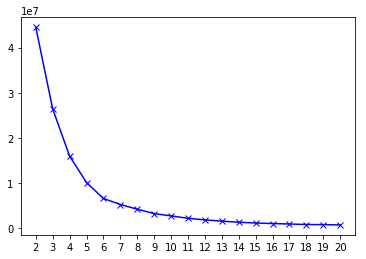

In [24]:
plt.plot(k_val_list, wss_list,'b-x')
plt.xticks(k_val_list)
plt.show()

In [25]:
# From the elbow method above and Silhouette and Calinski Harabaz scores, 6 clusters seems optimal
kmeans = KMeans(n_clusters=6)
kmodel = kmeans.fit(pca)
kmodel.labels_

array([1, 1, 3, ..., 2, 3, 1], dtype=int32)

In [27]:
Cust_tab['cluster'] = kmodel.labels_

In [28]:
kmodel.cluster_centers_

array([[ 2.64646515e+02,  6.11835173e-01],
       [-6.93426450e+01,  1.15156871e-01],
       [ 1.39676175e+03, -2.01071919e+00],
       [ 4.91469244e+01, -3.51083109e-01],
       [ 2.70264415e+03,  3.56128179e+00],
       [ 7.25928813e+02, -7.98483210e-01]])

In [29]:
clust_counts = Cust_tab.groupby('cluster').agg({'Customers.id':['count'],'Orders.id':[np.sum,np.min,np.max],'Order_Items.qty':[np.sum,np.min,np.max], \
                                 'Order_Items.price':[np.sum,np.min,np.max],'Order_Items.cost':[np.sum,np.min,np.max]}).reset_index()
clust_counts

cluster Customers.id Orders.id           Order_Items.qty            \
                 count       sum amin amax             sum amin amax   
0       0          156       276    1   10             995    1  300   
1       1         2038      2109    1    5            3848    1  220   
2       2           17        79    1   15             221    1   63   
3       3          803       969    1   11            2253    1  505   
4       4            4        26    1   14             105    1   74   
5       5           36       106    1   18             374    1   79   

  Order_Items.price                   Order_Items.cost                    
                sum     amin     amax              sum     amin     amax  
0          46683.93   213.75   482.50     36726.542718   156.60   379.99  
1          77333.64     1.12    87.55     55683.722718     0.28    88.50  
2          20551.37   942.60  1548.06     15463.100000   675.00  1171.15  
3         105010.75    64.80   225.35     81033.402718    31.29   173.06  
4           9101.50  1899.00  2696.38      6658.720000  1350.00  1991.22  
5          23781.07   444.00   880.64     18801.250000   375.87   675.00

In [30]:
clust_counts['avg_orders'] = clust_counts['Orders.id']['sum']/clust_counts['Customers.id']['count']
clust_counts['avg_ord_qty'] = clust_counts['Order_Items.qty']['sum']/clust_counts['Orders.id']['sum']
clust_counts['avg_ord_price'] = clust_counts['Order_Items.price']['sum']/clust_counts['Orders.id']['sum']

In [31]:
clust_counts

cluster Customers.id Orders.id           Order_Items.qty            \
                 count       sum amin amax             sum amin amax   
0       0          156       276    1   10             995    1  300   
1       1         2038      2109    1    5            3848    1  220   
2       2           17        79    1   15             221    1   63   
3       3          803       969    1   11            2253    1  505   
4       4            4        26    1   14             105    1   74   
5       5           36       106    1   18             374    1   79   

  Order_Items.price                   Order_Items.cost                    \
                sum     amin     amax              sum     amin     amax   
0          46683.93   213.75   482.50     36726.542718   156.60   379.99   
1          77333.64     1.12    87.55     55683.722718     0.28    88.50   
2          20551.37   942.60  1548.06     15463.100000   675.00  1171.15   
3         105010.75    64.80   225.35     81033.402718    31.29   173.06   
4           9101.50  1899.00  2696.38      6658.720000  1350.00  1991.22   
5          23781.07   444.00   880.64     18801.250000   375.87   675.00   

  avg_orders avg_ord_qty avg_ord_price  
                                        
0   1.769231    3.605072    169.144674  
1   1.034838    1.824561     36.668393  
2   4.647059    2.797468    260.143924  
3   1.206725    2.325077    108.370227  
4   6.500000    4.038462    350.057692  
5   2.944444    3.528302    224.349717

# Cluster Analysis

DEFINITIONS
<br>Price: Categorized based on avg price per order
<br>    Low: 0 - 110
<br>    Medium: 111 - 250
<br>    High: 251 - 350

<br>Volume: Categorized based on avg quantity per order
<br>    Low: 1 - 2 
<br>    Medium: 2.1 - 3
<br>    High: 3.1 - 4

<br>Buying Frequency: Categorized based on avg orders per customer
<br>    Infrequent: <=2 
<br>    Frequent: 2.1 - 4
<br>    Loyal: 4.1 - 8


<br>Cluster 0: Low Price, Medium Volume, Infrequent buyers
<br>Cluster 1: Low Price, Low Volume, Infrequent buyers
<br>Cluster 2: High Price, Medium Volume, Loyal customers
<br>Cluster 3: High Price, High Volume, Loyal customers
<br>Cluster 4: Medium Price, High Volume, Frequent buyers
<br>Cluster 5: Medium Price, High Volume, Infrequent buyers

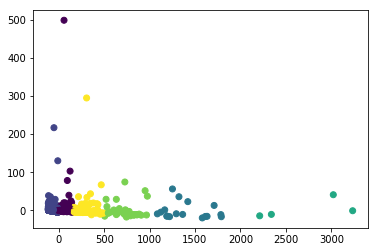

In [67]:
plt.scatter(pcaDF['principal component 1'],pcaDF['principal component 2'], c=kmodel.labels_)

In [86]:
# Feature Importance from PCA

pca_model = PCA(n_components=2).fit(X)
pca_model.explained_variance_ratio_, pca_model.components_

(array([ 0.99399904,  0.00429771]),
 array([[ 0.00227038,  0.60778239,  0.7940391 ,  0.009865  ],
        [ 0.02336489, -0.09146036,  0.05759219,  0.99386731]]))

## -- pca.components_ has the meaning of each principal component, essentially how it was derived #checking shape tells us it has 2 rows, one for each principal component and 4 columns, proportion of each of the 4 features #for each row - See more at: https://shankarmsy.github.io/posts/pca-sklearn.html#sthash.LISAS67n.dpuf

## Trying to decipher the meaning of the principal components print "Meaning of the 2 components:" for component in pca.components_: print " + ".join("%.2f x %s" % (value, name) for value, name in zip(component, iris.feature_names)) - See more at: https://shankarmsy.github.io/posts/pca-sklearn.html#sthash.LISAS67n.dpuf

# Find out the most popular product in each customer segment - provides us the ability to recommend products 

# Create RFM table - Recency, Frequency and Monetary 

In [32]:
'''rfmTable = df1.groupby('CustomerID').agg({'InvoiceDate': lambda x: (NOW - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalPrice': lambda x: x.sum()})
rfmTable['InvoiceDate'] = rfmTable['InvoiceDate'].astype(int)
rfmTable.rename(columns={'InvoiceDate': 'recency', 
                         'InvoiceNo': 'frequency', 
                         'TotalPrice': 'monetary_value'}, inplace=True)'''

"rfmTable = df1.groupby('CustomerID').agg({'InvoiceDate': lambda x: (NOW - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalPrice': lambda x: x.sum()})\nrfmTable['InvoiceDate'] = rfmTable['InvoiceDate'].astype(int)\nrfmTable.rename(columns={'InvoiceDate': 'recency', \n                         'InvoiceNo': 'frequency', \n                         'TotalPrice': 'monetary_value'}, inplace=True)"

In [33]:
'''quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

segmented_rfm = rfmTable'''

'''def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
segmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(RScore, args=('recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(FMScore, args=('frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(FMScore, args=('monetary_value',quantiles,))
segmented_rfm.head()

segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) 
                            + segmented_rfm.f_quartile.map(str) 
                            + segmented_rfm.m_quartile.map(str)
segmented_rfm.head()'''

"def RScore(x,p,d):\n    if x <= d[p][0.25]:\n        return 1\n    elif x <= d[p][0.50]:\n        return 2\n    elif x <= d[p][0.75]: \n        return 3\n    else:\n        return 4\n    \ndef FMScore(x,p,d):\n    if x <= d[p][0.25]:\n        return 4\n    elif x <= d[p][0.50]:\n        return 3\n    elif x <= d[p][0.75]: \n        return 2\n    else:\n        return 1\n    \nsegmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(RScore, args=('recency',quantiles,))\nsegmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(FMScore, args=('frequency',quantiles,))\nsegmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(FMScore, args=('monetary_value',quantiles,))\nsegmented_rfm.head()\n\nsegmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) \n                            + segmented_rfm.f_quartile.map(str) \n                            + segmented_rfm.m_quartile.map(str)\nsegmented_rfm.head()"

# PCA Feature Importance Explained

explained_variance_ratio_ shows component 1 contributes for 99% of the variance
<br>components_ shows 3rd variable of component 1 contributes to 79% variance 

So, we can conclude 3rd variable which is Price to be the most important feature 